# Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Data set

In [41]:
house=pd.read_csv('https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv')
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
house=house.drop(['id','date','lat','long','yr_renovated'],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


# Getting to Know your data

In [43]:
house.shape

(21613, 16)

In [44]:
house.index

RangeIndex(start=0, stop=21613, step=1)

In [45]:
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [46]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
zipcode          21613 non-null int64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [47]:
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [48]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,98077.939805,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,53.505026,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98118.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000


# Categorical data

In [49]:
house.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

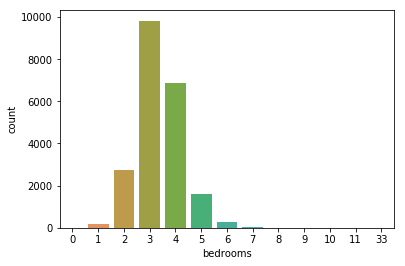

In [50]:
sns.countplot(house.bedrooms)

In [51]:
house.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

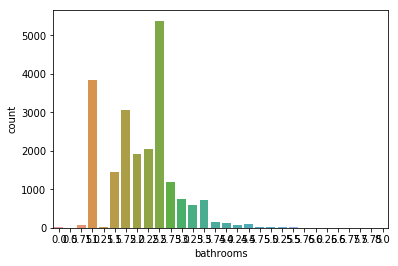

In [52]:
sns.countplot(house.bathrooms)

In [53]:
house.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

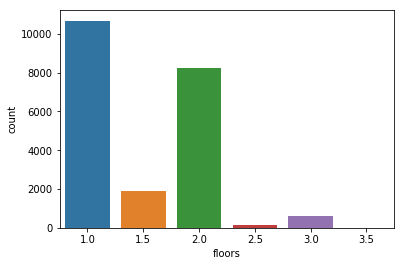

In [54]:
sns.countplot(house.floors)

In [55]:
house.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

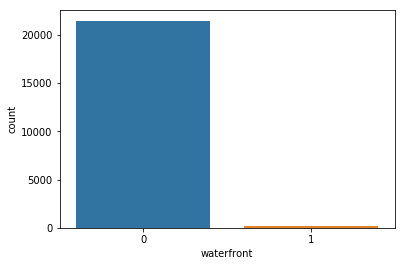

In [56]:
sns.countplot(house.waterfront)

In [57]:
house.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

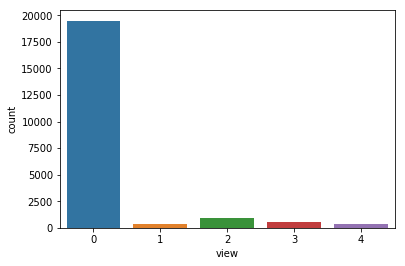

In [58]:
sns.countplot(house.view)

In [59]:
house.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

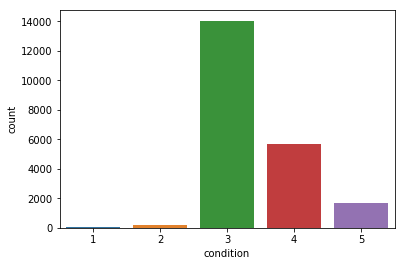

In [60]:
sns.countplot(house.condition)

In [61]:
house.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

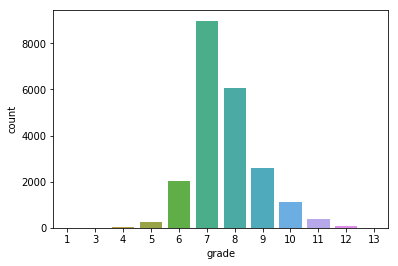

In [62]:
sns.countplot(house.grade)

In [63]:
house.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1966    250
1950    250
1994    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     59
1917     56
1914     54
1938     52
1903     46
1904     45
1936     40
1932     38
2015     38
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

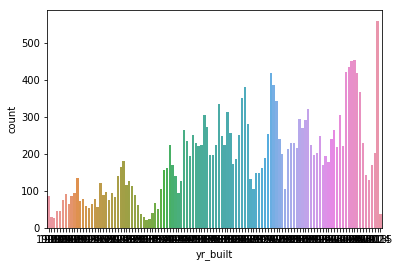

In [64]:
sns.countplot(house.yr_built)

In [65]:
house.zipcode.value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
98042    548
98034    545
98118    508
98023    499
98006    498
98133    494
98059    468
98058    455
98155    446
98074    441
98033    432
98027    412
98125    410
98056    406
98053    405
98001    362
98075    359
98126    354
98092    351
98144    343
98106    335
98116    330
98029    321
98004    317
98199    317
        ... 
98168    269
98112    269
98055    268
98107    266
98136    263
98178    262
98030    256
98177    255
98166    254
98022    234
98105    229
98045    221
98002    199
98077    198
98011    195
98019    190
98108    186
98119    184
98005    168
98007    141
98188    136
98032    125
98014    124
98070    118
98109    109
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

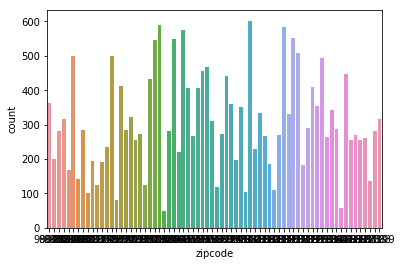

In [66]:
sns.countplot(house.zipcode)

# Visualizing the data sets

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


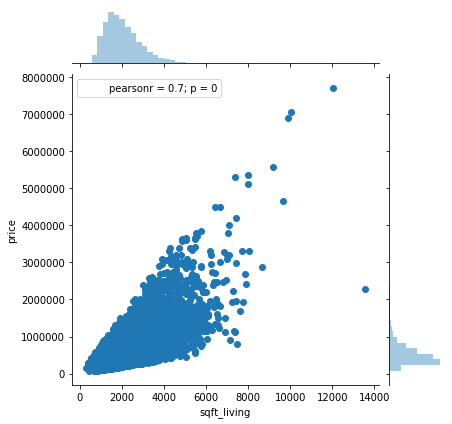

In [12]:
sns.jointplot(x=house.sqft_living,y=house.price)

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


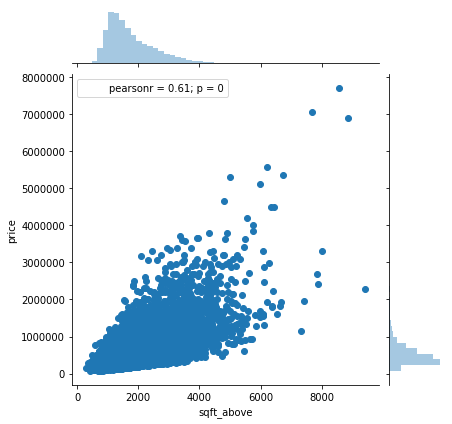

In [23]:
sns.jointplot(x=house.sqft_above,y=house.price)

C:\Users\mikkujain\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


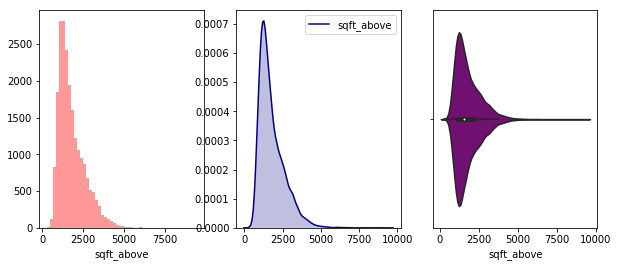

In [68]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
sns.distplot(house.sqft_above,color='red',kde=False)
plt.subplot(1,3,2)
sns.kdeplot(house.sqft_above,color='navy',shade=True)
plt.subplot(1,3,3)
sns.violinplot(house.sqft_above,color='purple')

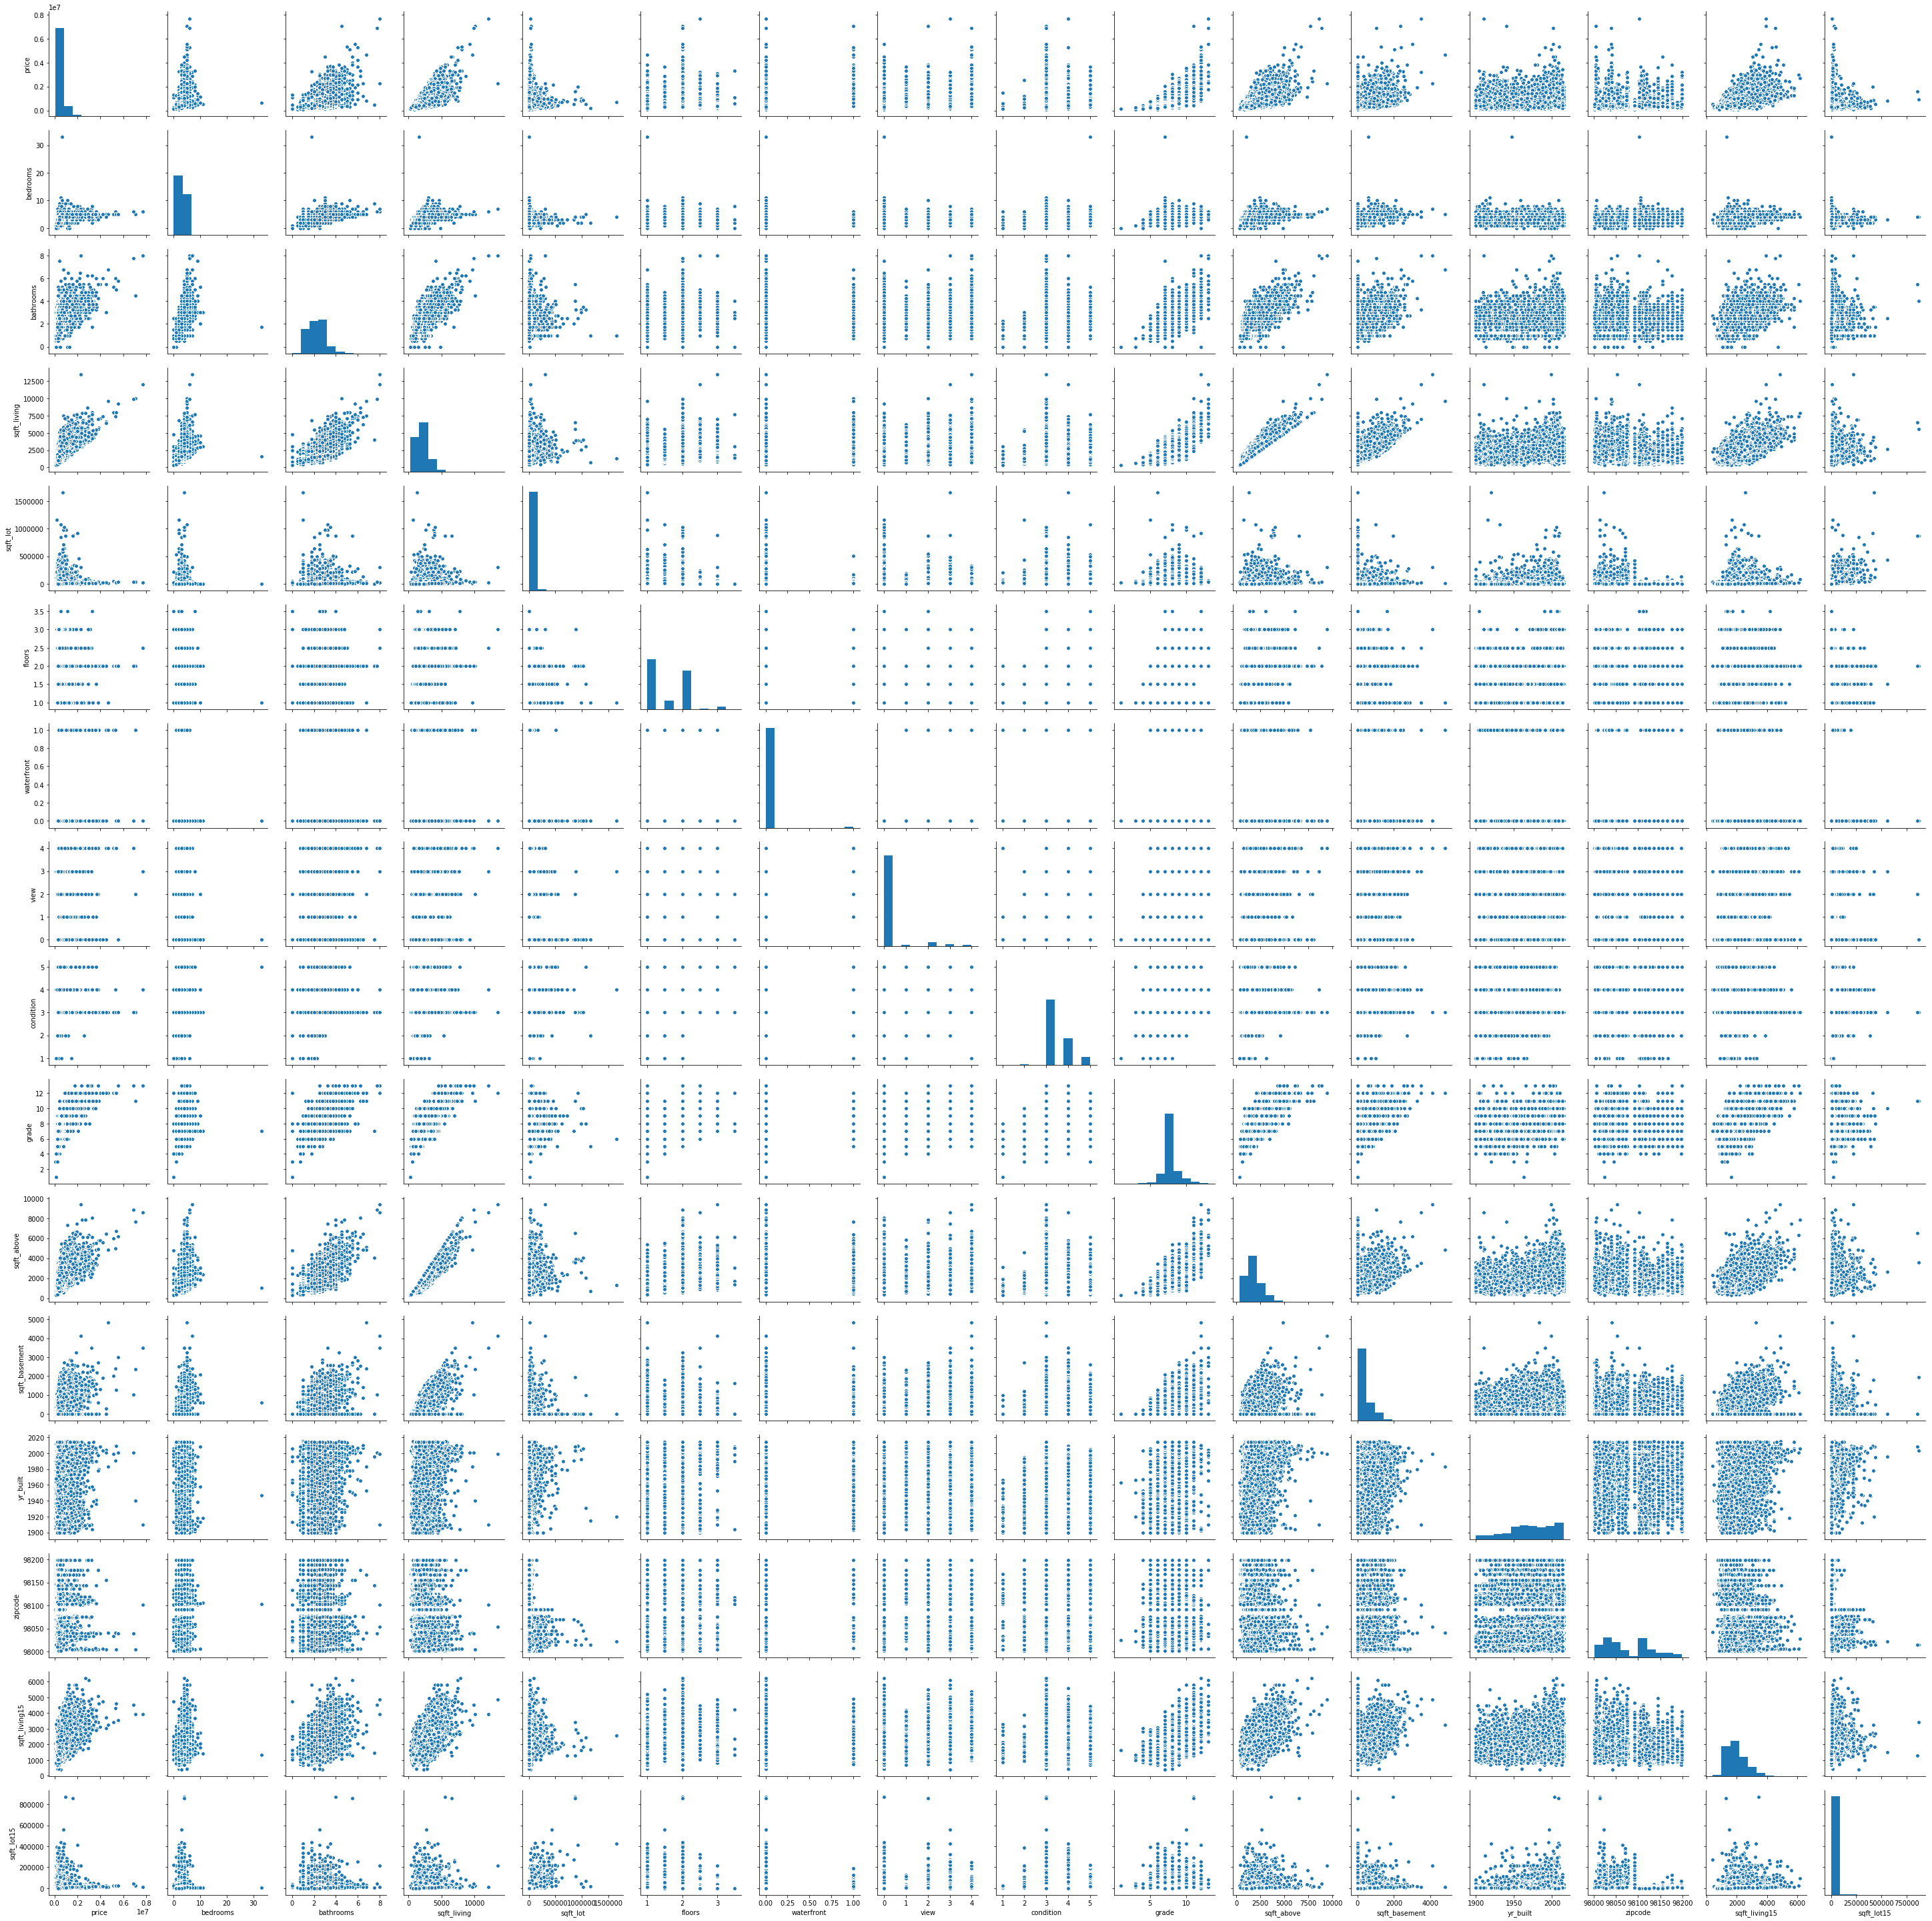

In [69]:
sns.pairplot(house)

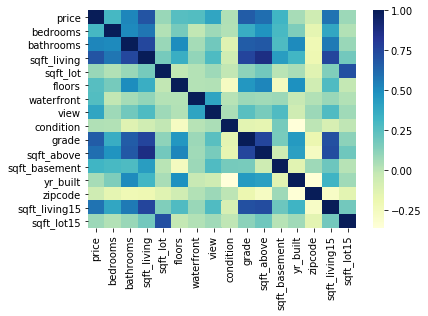

In [70]:
corr_matrix=house.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

# Normalize the data

In [71]:
house['price'] = ((house['price']-house['price'].min())/(house['price'].max()-house['price'].min()))

house['sqft_living'] = ((house['sqft_living']-house['sqft_living'].min())/(house['sqft_living'].max()-house['sqft_living'].min()))

house['sqft_lot'] = ((house['sqft_lot']-house['sqft_lot'].min())/(house['sqft_lot'].max()-house['sqft_lot'].min()))

house['sqft_above'] = ((house['sqft_above']-house['sqft_above'].min())/(house['sqft_above'].max()-house['sqft_above'].min()))

house['sqft_basement'] = ((house['sqft_basement']-house['sqft_basement'].min())/(house['sqft_basement'].max()-house['sqft_basement'].min()))

house['sqft_living15'] = ((house['sqft_living15']-house['sqft_living15'].min())/(house['sqft_living15'].max()-house['sqft_living15'].min()))

house['sqft_lot15'] = ((house['sqft_lot15']-house['sqft_lot15'].min())/(house['sqft_lot15'].max()-house['sqft_lot15'].min()))



# Preparing the datasets

In [72]:
#import scitic libraries
from sklearn.model_selection import train_test_split as tts
train,test=tts(house, test_size=0.3)

In [73]:
train_x=train.loc[:, train.columns != 'price']
test_x=test.loc[:, train.columns != 'price']

train_y=train['price']
test_y=test['price']

In [74]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Predict the values

In [75]:
test_pred=model.predict(test_x)

In [76]:
result=pd.DataFrame({'Actual_price':test_y,'Predicted_price':test_pred})
print(result)

       Actual_price  Predicted_price
1419       0.036066         0.040132
2377       0.047475         0.045199
9031       0.047213         0.056910
1564       0.070164         0.046035
10513      0.083934         0.105593
1087       0.019672         0.030972
11451      0.075016         0.074415
3508       0.081311         0.070409
18159      0.031475         0.072695
15593      0.022951         0.033839
4326       0.028131         0.040017
6667       0.134426         0.073429
887        0.051279         0.017635
12139      0.051934         0.053958
8559       0.056577         0.060028
18674      0.026230         0.041879
20470      0.041443         0.021315
11445      0.064918         0.092640
11362      0.103213         0.129311
20219      0.057705         0.039227
17531      0.022820         0.021036
13203      0.132459         0.133865
1338       0.098361         0.095565
15514      0.055738         0.105288
5358       0.029508         0.032947
12360      0.054230         0.037040
1

# Finding erros

In [77]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae
print(mae(test_y,test_pred)*100)
print(mse(test_y,test_pred)*100)

1.8431538794962725
0.07707846276986806


# computing r2 score to predict the accuracy of model

In [78]:
from sklearn.metrics import r2_score
print(r2_score(test_y,test_pred)*100)

65.15488797661084


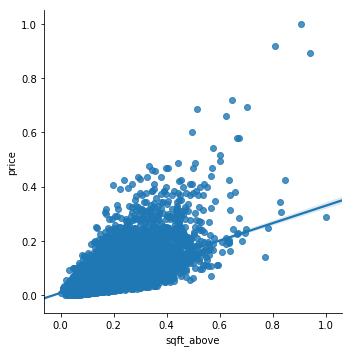

In [79]:
sns.lmplot(x="sqft_above", y="price", data=house);

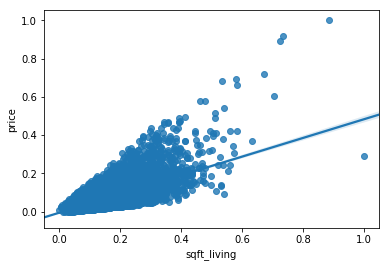

In [80]:
sns.regplot(x="sqft_living", y="price", data=house);